
### BELOW IS THE CODE TO FIND ANY SIGNIFICANT FACTORS DESCRIBING CRIME TRENDS IN TORONTO

In [ ]:
#!pip install TwitterSearch
#!pip install twython
#!pip install wordcloud


In [2]:
# Import necessary pacakages
import re
from twython import Twython
import TwitterSearch
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image as im
from config import access_token
from config import access_secret
from config import consumer_key
from config import consumer_secret

# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
#from itertools import cycle, islice
import pandas as pd
import numpy as np
import gmaps

#google developer api key
from config_google import api_key

#configure gmaps
gmaps.configure(api_key = api_key)

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [3]:
#connect to Twitter
api=Twython(consumer_key,consumer_secret,access_token,access_secret)


In [4]:
#Search Twitter

from TwitterSearch import *
try:
    tso=TwitterSearchOrder()#Create a twitter search order object
    tso.set_keywords(['Toronto','Crime'])#define all words we want to search
    tso.set_language('en')#only english tweets
    tso.set_include_entities(False)#and dont give us all those 
    #tso.set_since('2018-01-01')
    #tso.set_until=('2018-12-01')#To only include tweets in 2018
    
    #Twitter search object with our secret tokens
    ts=TwitterSearch(
    consumer_key=consumer_key,
    consumer_secret=consumer_secret,
    access_token=access_token,
    access_token_secret=access_secret   
    )
    
    #loop through list and extract information
    #Extract textfields from tweets
    raw_tweets=[]
    for tweet in ts.search_tweets_iterable(tso):
        print( '@%s tweeted: %s' % ( tweet['user']['screen_name'], tweet['text'] ) )
        raw_tweets.append(tweet['text'])
except TwitterSearchException as e: # take care of all those ugly errors if there are some
    print(e)
    

@kdmac68 tweeted: @RevisitingLife @mountkidd @DrJacobsRad Except most of those things are in the Provincial jurisdiction. You no long… https://t.co/pM9z6PUIqR
@ARadziwill tweeted: RT @DavidMilley22: How the crime rate in Toronto

How's diversity working

Your policies have destroyed Toronto

Nobody wears a poppy downt…
@Voshon99916056 tweeted: @SafeCity_TO @Docs4GunControl @kristynwongtam @ChrisGloverMPP This meeting did nothing to achieve any progress, tor… https://t.co/AL18SUUugu
@sasky1959 tweeted: RT @DavidMilley22: How the crime rate in Toronto

How's diversity working

Your policies have destroyed Toronto

Nobody wears a poppy downt…
@_Tosin tweeted: But tbh doesn't Calgary have Safe Injection Sites Downtown? I probably shouldn't feel as Uncomfortable Downtown as… https://t.co/OuvYY4ISmm
@longbranch303 tweeted: @Polysesouvient @cityoftoronto @mattybing @globalnewsto With morons like this running the city, it comes as no surp… https://t.co/d1SarRd4Rl
@mountkidd tweeted: RT @Revisi

@kensteady79 tweeted: RT @DavidMilley22: How the crime rate in Toronto

How's diversity working

Your policies have destroyed Toronto

Nobody wears a poppy downt…
@Bret_Sears tweeted: RT @DavidMilley22: How the crime rate in Toronto

How's diversity working

Your policies have destroyed Toronto

Nobody wears a poppy downt…
@Simonlevrai007 tweeted: RT @DavidMilley22: @JohnTory How the crime rate in Toronto

How's diversity workin

Your policies have destroyed Toronto

Nobody wears a po…
@Warrioroftruths tweeted: RT @DavidMilley22: How the crime rate in Toronto

How's diversity working

Your policies have destroyed Toronto

Nobody wears a poppy downt…
@DavidMilley22 tweeted: How the crime rate in Toronto

How's diversity working

Your policies have destroyed Toronto

Nobody wears a poppy… https://t.co/6VqvBe2XM9
@DavidMilley22 tweeted: @JohnTory How the crime rate in Toronto

How's diversity workin

Your policies have destroyed Toronto

Nobody wears… https://t.co/NB4svCuK5q
@lullhater tw

@ernie_slater tweeted: RT @TrueBLB: Toronto police officer calls Tory 'direct contributor' to gun violence | CTV News

#toronto #ontario #crime #guncontrol #lagos…
@RBou375 tweeted: RT @TrueBLB: Toronto police officer calls Tory 'direct contributor' to gun violence | CTV News

#toronto #ontario #crime #guncontrol #lagos…
@MABurrowes tweeted: RT @TrueBLB: Toronto police officer calls Tory 'direct contributor' to gun violence | CTV News

#toronto #ontario #crime #guncontrol #lagos…
@Chuck97921221 tweeted: Police should be arresting politicians for obstruction of justice. 

We all know whose to blame for crime in Toront… https://t.co/k8PTOjq2fR
@shov3lh3ad82 tweeted: RT @TrueBLB: Toronto police officer calls Tory 'direct contributor' to gun violence | CTV News

#toronto #ontario #crime #guncontrol #lagos…
@JonLuppino10 tweeted: RT @TrueBLB: Toronto police officer calls Tory 'direct contributor' to gun violence | CTV News

#toronto #ontario #crime #guncontrol #lagos…
@PDK4863 tweeted: RT @

@TamsClarence tweeted: @DanMCalgary I think Don Cherry was probably referring to the fact that the poppy was supposed to be a rainbow colo… https://t.co/pWuwdjPqq7
@Sunnydays180 tweeted: RT @BillBlair: Andrew Scheer is talking about gun crime in Toronto today, but he doesn’t want to talk about guns. Scheer’s plan is to bring…
@drwokes_toenail tweeted: RT @PinkNews: A queer woman fought back against a homophobe in a way that’s tearing LGBT+ Twitter apart https://t.co/l88Qpohk8W
@kristinechamb11 tweeted: RT @TPSOperations: Emergency in Toronto Call 911~Non-Emergency call 416-808-2222~Anonymous Crime Stoppers tips to prevent/solve crime call…
@bigeneral tweeted: RT @TWilsonOttawa: Brad Warner and Joe Warmington discuss the out of control gang violence, increased illicit gun smuggling and the Liberal…
@ThirteenCanuck tweeted: RT @TheGunBlog: Ever feel like Toronto activists in politics, media + medicine leave out important context?

Attack by Bullet
- Rare: Less…
@PeterDeruelle tweeted: RT

@rockcitymark tweeted: RT @leighgt: @rexglacer Li erals love it when guns are used because they can blame guns. In Toronto yesterday two masked thugs in broad day…
@mattcapranos tweeted: RT @TheGunBlog: Ever feel like Toronto activists in politics, media + medicine leave out important context?

Attack by Bullet
- Rare: Less…
@NorbertNeumann7 tweeted: RT @leighgt: @rexglacer Li erals love it when guns are used because they can blame guns. In Toronto yesterday two masked thugs in broad day…
@rexglacer tweeted: RT @leighgt: @rexglacer Li erals love it when guns are used because they can blame guns. In Toronto yesterday two masked thugs in broad day…
@DymentRoy tweeted: RT @TheGunBlog: Ever feel like Toronto activists in politics, media + medicine leave out important context?

Attack by Bullet
- Rare: Less…
@CounterBalanceT tweeted: RT @TheGunBlog: Ever feel like Toronto activists in politics, media + medicine leave out important context?

Attack by Bullet
- Rare: Less…
@TheThuggernaut twe

@PissedOffMonkey tweeted: RT @TWilsonOttawa: Brad Warner and Joe Warmington discuss the out of control gang violence, increased illicit gun smuggling and the Liberal…
@RBou375 tweeted: RT @TWilsonOttawa: Brad Warner and Joe Warmington discuss the out of control gang violence, increased illicit gun smuggling and the Liberal…
@DawsonMdhoust tweeted: RT @TWilsonOttawa: Brad Warner and Joe Warmington discuss the out of control gang violence, increased illicit gun smuggling and the Liberal…
@DCTFTW tweeted: RT @TWilsonOttawa: Brad Warner and Joe Warmington discuss the out of control gang violence, increased illicit gun smuggling and the Liberal…
@CamberwellHouse tweeted: MISSING: Lily Constant, 15.  5'3", slim build, blue eyes, long straight blonde hair.  Parents and police are concer… https://t.co/9jjuJQls3I
@Jwls1006 tweeted: RT @CCFR_CCDAF: Brad Warner and Joe Warmington discuss the out of control gang violence, increased illicit gun smuggling and the Liberal so…
@wlatourt tweeted: RT @T

@shane_isms tweeted: RT @CCFR_CCDAF: Brad Warner and Joe Warmington discuss the out of control gang violence, increased illicit gun smuggling and the Liberal so…
@Magnum240 tweeted: RT @CCFR_CCDAF: Brad Warner and Joe Warmington discuss the out of control gang violence, increased illicit gun smuggling and the Liberal so…
@EdgcumbeJohn tweeted: @MarleneJF4 You go girl. Dont blame Ontario.  
Toronto is a different country now. There are 2 Ontarios like 2 bc,s… https://t.co/3HsUREPZTj
@Gunpiper1 tweeted: RT @CCFR_CCDAF: Brad Warner and Joe Warmington discuss the out of control gang violence, increased illicit gun smuggling and the Liberal so…
@Gunpiper1 tweeted: RT @TWilsonOttawa: Brad Warner and Joe Warmington discuss the out of control gang violence, increased illicit gun smuggling and the Liberal…
@motoluvr tweeted: RT @CCFR_CCDAF: Brad Warner and Joe Warmington discuss the out of control gang violence, increased illicit gun smuggling and the Liberal so…
@pinpuller tweeted: RT @CCFR_CC

@18aidenwood tweeted: RT @EaterMontreal: Toronto commits a crime against Quebec with this rainbow-coloured "unicorn poutine" https://t.co/hyrJpppWVb https://t.co…
@A_Deputy_OFMEM tweeted: RT @TorontoPolice: Please retweet. Composite sketch of man to ID by Toronto Police in 85 Shuter Street arson investigation that injured 2 T…
@derekdj1954 tweeted: RT @TorontoPolice: Please retweet. Composite sketch of man to ID by Toronto Police in 85 Shuter Street arson investigation that injured 2 T…
@Melanie_Zabawa tweeted: RT @TorontoPolice: Please retweet. Composite sketch of man to ID by Toronto Police in 85 Shuter Street arson investigation that injured 2 T…
@AngelaVitacco tweeted: RT @TorontoPolice: Please retweet. Composite sketch of man to ID by Toronto Police in 85 Shuter Street arson investigation that injured 2 T…
@SharonSedgeman tweeted: RT @TorontoPolice: Please retweet. Composite sketch of man to ID by Toronto Police in 85 Shuter Street arson investigation that injured 2 T…
@boscobaby2

@glennvector tweeted: RT @99freemind: @RosieBarton There is a crime epidemic in Toronto.
People can't afford their bills food because of taxation.
The medical in…
@CymbleneJ tweeted: RT @99freemind: @RosieBarton There is a crime epidemic in Toronto.
People can't afford their bills food because of taxation.
The medical in…
@douglasyardley tweeted: RT @TorontoPolice: Toronto Police @TrafficServices ask public for info on who was driving a 2007-2009 Mitsubishi Lancer that struck/killed…
@kireaton tweeted: RT @99freemind: @RosieBarton There is a crime epidemic in Toronto.
People can't afford their bills food because of taxation.
The medical in…
@RealPistolPete7 tweeted: RT @samike88: #TORONTO  becoming a cesspool of #GUN #CRIME

 While our politicians and police FIDDLE !!

 @JohnTory @fordnation @JustinTrud…
@Sandra_Cole44 tweeted: Arson Investigation that resulted in 2 Toronto Fire Fighters seriously injured. Help identify the person of interes… https://t.co/UZZNaBuHNN
@CCove99 tweeted: A

@ubipages tweeted: @financialpost Meanwhile Toronto crime is skyrocketing
@TPS_Bill tweeted: RT @TorontoPolice: Toronto Police @TrafficServices ask public for info on who was driving a 2007-2009 Mitsubishi Lancer that struck/killed…
@KDonovan05 tweeted: RT @JeremyCohnTV: 4 AM: Man rushed to trauma centre w/ critical injuries from a shooting on Glenside Av, near Greenwood Av &amp; Gerrard St E.…
@hennybvtch tweeted: Wtf is really goin on this year!? Toronto’s crime rate has been outrageous
@MattamyWatch tweeted: Hey @JohnTory - how come @BLM_TO aren’t yelling about all the shootings in #Toronto , especially after last night?… https://t.co/VzWZw1rdQj
@GunFactsCanada tweeted: @girlfreddy @kilometresoflun @sparks_1_3 @TorontoStar Toronto Police corrected those figures.

Here are the latest… https://t.co/PKyavYgXkt
@MirellaLeone tweeted: RT @TorontoPolice: Toronto Police @TrafficServices ask public for info on who was driving a 2007-2009 Mitsubishi Lancer that struck/killed…
@madhatressTO t

@Trippy3225 tweeted: RT @IamKasheba: Toronto's crime rate is crazy. 

Too many people dropping out and ain't nobody safe, female or male. My advice to everyone…
@Marvelanne973 tweeted: RT @rexglacer: Trudeau's taxpayer funded Toronto rag running defence for soft on crime Liberals &amp; gutless politicians while gangsters shoot…
@PCoppositionNL tweeted: 2/2 In view of the fact that the Statistics Canada Crime Severity Index ranks St. John’s worse for crime than Toron… https://t.co/9yy5P4vtuG
@Dangerous_Bratt tweeted: RT @IamKasheba: Toronto's crime rate is crazy. 

Too many people dropping out and ain't nobody safe, female or male. My advice to everyone…
@TitasTomes tweeted: Scarborough is a low-income, culturally diverse neighborhood east of Toronto, the fourth largest city in North Amer… https://t.co/9JMP0bdkOi
@Birdmananyweat1 tweeted: @emeraldtyger Second generation offspring of immigrants far outperform the children of low income US citizens by al… https://t.co/pQX80XvRhc
@Canadian

@CTOAssoc tweeted: Here's what those Vancouver police stats don't tell you about Oppenheimer homeless camp and crime - Toronto Star… https://t.co/uhVNqbcycg
@canucklaw1 tweeted: @bryttan77 @MonicaFibonacci Yes, because now when "diversity" commits violent crime in Toronto (and it will continu… https://t.co/LHjoQq0qAL
@KirbStompGA tweeted: -OP claims to have committed a crime in the name of the LGBTQ+ community, potentially justifying bigots' hate of th… https://t.co/UiMuEjdhG6
@wilmot786 tweeted: RT @themadsloth: Crime in Toronto is spiraling out of control.
@JoeBuchanan7 tweeted: RT @themadsloth: Crime in Toronto is spiraling out of control.
@JimStarkey16 tweeted: RT @themadsloth: Crime in Toronto is spiraling out of control.
@He48300141 tweeted: RT @themadsloth: Crime in Toronto is spiraling out of control.
@waldock_k tweeted: @JohnTory 
We'll known you're serious about crime when you start enforcing the law; when you put the freedom &amp; safe… https://t.co/RBDfhdnKL4
@casperthemedi

@appetizer_tours tweeted: RT Eater "RT EaterMontreal: Toronto commits a crime against Quebec with this rainbow-coloured "unicorn poutine"… https://t.co/GCr98bgGGa
@mlewis73 tweeted: RT @TorontoStar: A man has been arrested and charged with five counts of attempted murder after five teens were shot at an apartment buildi…
@TorontoStar tweeted: A man has been arrested and charged with five counts of attempted murder after five teens were shot at an apartment… https://t.co/BdNpb8K6uH
@Eater tweeted: RT @EaterMontreal: Toronto commits a crime against Quebec with this rainbow-coloured "unicorn poutine" https://t.co/hyrJpppWVb https://t.co…
@JBCommonSenseW1 tweeted: @GaucheArtist @99freemind Because the TDSB is doing such a great job? The lack of morality &amp; family values is a hug… https://t.co/MMd3q91XYE
@BeachSnob tweeted: RT @RossMcleanSec: boys aged 14, 15, 16, 17  all arrested with firearms in #Toronto by the police..... great work.....soon we will need rea…
@v_dussault tweeted: RT @

In [5]:
raw_tweets

['@RevisitingLife @mountkidd @DrJacobsRad Except most of those things are in the Provincial jurisdiction. You no long… https://t.co/pM9z6PUIqR',
 "RT @DavidMilley22: How the crime rate in Toronto\n\nHow's diversity working\n\nYour policies have destroyed Toronto\n\nNobody wears a poppy downt…",
 '@SafeCity_TO @Docs4GunControl @kristynwongtam @ChrisGloverMPP This meeting did nothing to achieve any progress, tor… https://t.co/AL18SUUugu',
 "RT @DavidMilley22: How the crime rate in Toronto\n\nHow's diversity working\n\nYour policies have destroyed Toronto\n\nNobody wears a poppy downt…",
 "But tbh doesn't Calgary have Safe Injection Sites Downtown? I probably shouldn't feel as Uncomfortable Downtown as… https://t.co/OuvYY4ISmm",
 '@Polysesouvient @cityoftoronto @mattybing @globalnewsto With morons like this running the city, it comes as no surp… https://t.co/d1SarRd4Rl',
 'RT @RevisitingLife: @DrJacobsRad #LPC are terrible for Toronto: \n\nCrime is WAY up; transit abysmal; energy prices c

In [6]:
#Create a string from our list of text
raw_string=''.join(raw_tweets)
no_links=re.sub(r'http\S+','',raw_string)
no_unicode=re.sub(r"\\[a-z][a-z]?[0-9]+", '',no_links)
no_special_characters=re.sub('[^A-Za-z ]+', '', no_unicode)

In [7]:
no_special_characters

'RevisitingLife mountkidd DrJacobsRad Except most of those things are in the Provincial jurisdiction You no long  DavidMilley How the crime rate in TorontoHows diversity workingYour policies have destroyed TorontoNobody wears a poppy downtSafeCityTO DocsGunControl kristynwongtam ChrisGloverMPP This meeting did nothing to achieve any progress tor  DavidMilley How the crime rate in TorontoHows diversity workingYour policies have destroyed TorontoNobody wears a poppy downtBut tbh doesnt Calgary have Safe Injection Sites Downtown I probably shouldnt feel as Uncomfortable Downtown as  cityoftoronto mattybing globalnewsto With morons like this running the city it comes as no surp  RevisitingLife DrJacobsRad LPC are terrible for Toronto Crime is WAY up transit abysmal energy prices crazy inflation crazy dJohnTory You are way off base Tory your new plans for Toronto to add a carbon tax to the property tax Crime is up  cityoftoronto mattybing globalnewsto A spokesperson for Border Security and 

In [8]:
words=no_special_characters.split(" ")
words=[w for w in words if len(w)>2]#ignore a,an,be,so etc.
words=[w.lower()for w in words]
words=[w for w in words if w not in STOPWORDS]

In [9]:
words

['revisitinglife',
 'mountkidd',
 'drjacobsrad',
 'except',
 'things',
 'provincial',
 'jurisdiction',
 'long',
 'davidmilley',
 'crime',
 'rate',
 'torontohows',
 'diversity',
 'workingyour',
 'policies',
 'destroyed',
 'torontonobody',
 'wears',
 'poppy',
 'downtsafecityto',
 'docsguncontrol',
 'kristynwongtam',
 'chrisglovermpp',
 'meeting',
 'nothing',
 'achieve',
 'progress',
 'tor',
 'davidmilley',
 'crime',
 'rate',
 'torontohows',
 'diversity',
 'workingyour',
 'policies',
 'destroyed',
 'torontonobody',
 'wears',
 'poppy',
 'downtbut',
 'tbh',
 'doesnt',
 'calgary',
 'safe',
 'injection',
 'sites',
 'downtown',
 'probably',
 'shouldnt',
 'feel',
 'uncomfortable',
 'downtown',
 'cityoftoronto',
 'mattybing',
 'globalnewsto',
 'morons',
 'running',
 'city',
 'comes',
 'surp',
 'revisitinglife',
 'drjacobsrad',
 'lpc',
 'terrible',
 'toronto',
 'crime',
 'way',
 'transit',
 'abysmal',
 'energy',
 'prices',
 'crazy',
 'inflation',
 'crazy',
 'djohntory',
 'way',
 'base',
 'tory',


In [10]:
wc=WordCloud(background_color="white",max_words=1000)
clean_string=','.join(words)
wc.generate(clean_string)

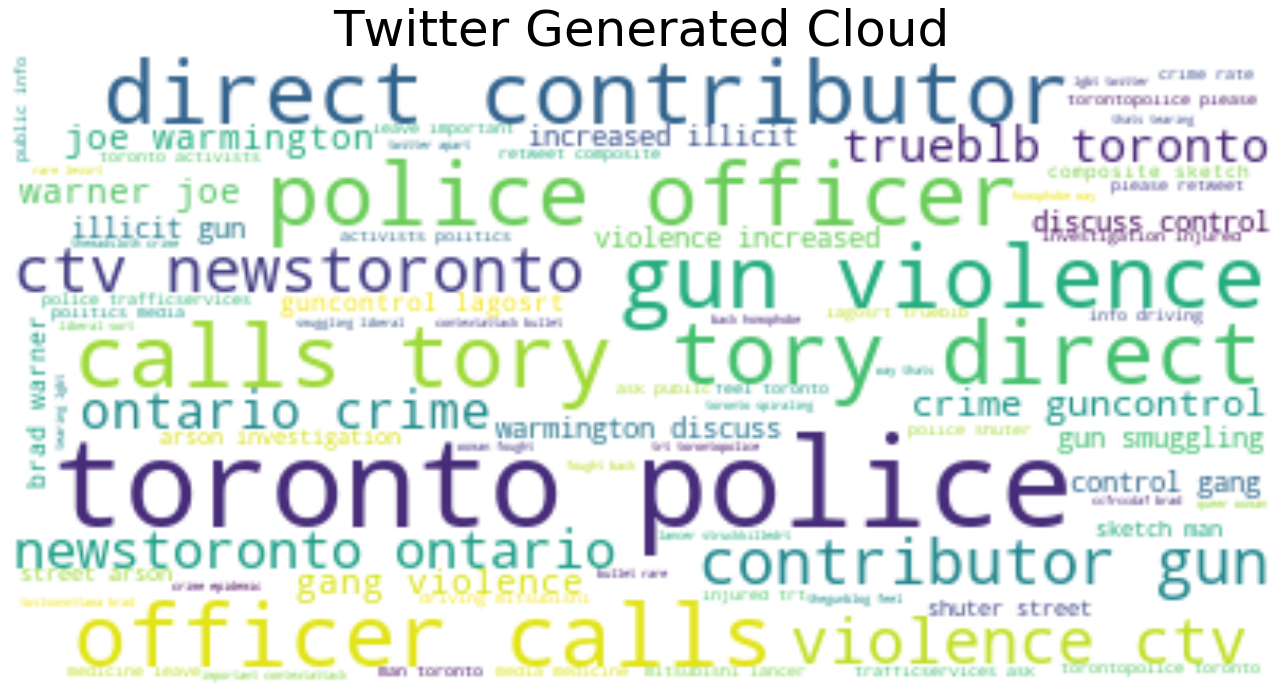

In [11]:
f = plt.figure(figsize=(50,50))
f.add_subplot(1,2, 1)
#plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.title('Original Stencil', size=20)
plt.axis("off")
#f.add_subplot(1,2, 2)
plt.imshow(wc, interpolation='bilinear')
plt.title('Twitter Generated Cloud', size=50)
plt.axis("off")
plt.show()

## Staring From Rental Data

In [3]:
Rental_DF = pd.DataFrame(pd.read_csv("Toronto_apartment_rentals_2018.csv"))

In [4]:
Rental_DF.head()

,Bedroom,Bathroom,Den,Address,Lat,Long,Price
0,2,2.0,0,"3985 Grand Park Drive, 3985 Grand Park Dr, Mis...",43.581639,-79.648193,"$2,450.00"
1,1,1.0,1,"361 Front St W, Toronto, ON M5V 3R5, Canada",43.643051,-79.391643,"$2,150.00"
2,1,1.0,0,"89 McGill Street, Toronto, ON, M5B 0B1",43.660605,-79.378635,"$1,950.00"
3,2,2.0,0,"10 York Street, Toronto, ON, M5J 0E1",43.641087,-79.381405,"$2,900.00"
4,1,1.0,0,"80 St Patrick St, Toronto, ON M5T 2X6, Canada",43.652487,-79.389622,"$1,800.00"


In [5]:
# Convert Price column string value to float
Rental_DF["Price"] = Rental_DF["Price"].replace('[\$,]', '', regex=True).astype(float)
Rental_DF.head()

,Bedroom,Bathroom,Den,Address,Lat,Long,Price
0,2,2.0,0,"3985 Grand Park Drive, 3985 Grand Park Dr, Mis...",43.581639,-79.648193,2450.0
1,1,1.0,1,"361 Front St W, Toronto, ON M5V 3R5, Canada",43.643051,-79.391643,2150.0
2,1,1.0,0,"89 McGill Street, Toronto, ON, M5B 0B1",43.660605,-79.378635,1950.0
3,2,2.0,0,"10 York Street, Toronto, ON, M5J 0E1",43.641087,-79.381405,2900.0
4,1,1.0,0,"80 St Patrick St, Toronto, ON M5T 2X6, Canada",43.652487,-79.389622,1800.0


## Pulling Crime Data

In [6]:
Crime_DF = pd.DataFrame(pd.read_csv("MCI_2014_to_2018.csv"))
Crime_DF.head()

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,...,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Lat,Long,ObjectId
0,-79.385193,43.659229,2349,GO-20149004286,2014-06-20T10:55:00.000Z,2014-06-20T13:20:00.000Z,Apartment,2130,210,Theft Over,...,171.0,Friday,10,Theft Over,D52,76,Bay Street Corridor (76),43.659229,-79.385193,2001
1,-79.425400,43.777592,2350,GO-20142411379,2014-07-02T00:20:00.000Z,2014-07-02T02:58:00.000Z,Outside,1457,100,Pointing A Firearm,...,183.0,Wednesday,0,Assault,D32,36,Newtonbrook West (36),43.777592,-79.425400,2002
2,-79.425400,43.777592,2351,GO-20142411379,2014-07-02T00:20:00.000Z,2014-07-02T02:58:00.000Z,Outside,1610,100,Robbery With Weapon,...,183.0,Wednesday,0,Robbery,D32,36,Newtonbrook West (36),43.777592,-79.425400,2003
3,-79.210373,43.801727,2352,GO-20142412127,2014-07-02T01:30:00.000Z,2014-07-02T05:40:00.000Z,House,2120,200,B&E,...,183.0,Wednesday,1,Break and Enter,D42,132,Malvern (132),43.801727,-79.210373,2004
4,-79.254334,43.835884,2354,GO-20142417548,2014-07-02T20:52:00.000Z,2014-07-02T20:57:00.000Z,Commercial,1430,100,Assault,...,183.0,Wednesday,20,Assault,D42,130,Milliken (130),43.835884,-79.254334,2005


In [7]:
# Rental price (bin)
bins=[50.90,1000.90,2000.90,3000.90,4000.90,5000.90,10000.90,50000.90,600000.90]
group_name=["50-1000$","1001-2000$","2001-3000$","3001-4000$","4001-5000$","5001-10000$","10001-50000$","50001-600000$"]
Rental_DF["Price Range"] = pd.cut(Rental_DF["Price"],bins,labels=group_name)
groupAnalysis_ByRentalPrice = Rental_DF.groupby(['Price Range'])
Property_count=groupAnalysis_ByRentalPrice["Address"].count()
Rental_analysis=pd.DataFrame({"Total Rental Properties":Property_count})

Rental_analysis

,Total Rental Properties
Price Range,
50-1000$,41
1001-2000$,463
2001-3000$,511
3001-4000$,90
4001-5000$,11
5001-10000$,4
10001-50000$,1
50001-600000$,3


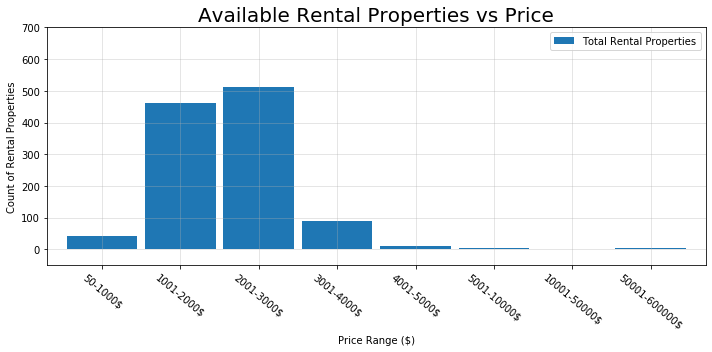

In [8]:
#Plot the bar graph for Rental properties by price range

Rental_analysis.plot.bar(width=.9,figsize=(10,5))
# Orient widths. Add labels, tick marks, etc. 
plt.title("Available Rental Properties vs Price",fontsize=20)
plt.xlabel("Price Range ($)",fontsize=10)
plt.ylabel("Count of Rental Properties",fontsize=10)
plt.ylim(-50,700)
plt.xticks(rotation=-40)
plt.grid(alpha = .4)
plt.tight_layout()

In [9]:
# Maximum Available Rental Properties and Price Range
Rental_Avl_Properties=pd.DataFrame(Rental_analysis.iloc[Rental_analysis["Total Rental Properties"].values.argmax()])
Rental_Avl_Properties


,2001-3000$
Total Rental Properties,511


In [10]:
# Top 5 Expensive Neighborhood 

data=Rental_DF[["Price","Address","Bedroom","Bathroom","Lat","Long"]]
Top_data=pd.DataFrame(data)
Top_data1=Top_data.sort_values("Price",ascending=False)
Top_data1.head()

,Price,Address,Bedroom,Bathroom,Lat,Long
238,535000.0,"101 Charles St, TORONTO, ON, M4Y 1V2",1,1.0,43.669593,-79.380580
129,535000.0,"101 Charles St, TORONTO, ON, M4Y 1V2",1,1.0,43.669593,-79.380580
371,535000.0,"101 Charles St, TORONTO, ON, M4Y 1V2",1,1.0,43.669593,-79.380580
917,36900.0,", TORONTO M4T 1P3 ON, Canada",2,1.0,43.690463,-79.381576
952,9750.0,"311 Bay St, Toronto, ON M5H 4G5, Canada",2,2.5,43.649783,-79.380440


In [11]:
# Top 5 Low Cost Neighborhood 
Low_data=Top_data.sort_values("Price")
Low_data.head()

,Price,Address,Bedroom,Bathroom,Lat,Long
816,65.0,"Euclid Ave, Toronto, ON, Canada",1,2.0,43.658689,-79.412577
973,99.0,"2121 Lake Shore Blvd W, Etobicoke, ON M8V 4E9,...",1,2.0,43.627447,-79.478374
794,99.0,"8 Wellesley St E, Toronto, ON M4Y 3B2, Canada",1,1.0,43.665233,-79.384293
761,150.0,", Toronro M4V 1N5 ON, Canada",1,1.0,43.686511,-79.399522
1110,300.0,"195 Wynford Dr, North York, ON M3C 3P3, Canada",1,1.0,43.723587,-79.324879


In [12]:
Crime_DF.columns


Index(['X', 'Y', 'Index_', 'event_unique_id', 'occurrencedate', 'reporteddate',
       'premisetype', 'ucr_code', 'ucr_ext', 'offence', 'reportedyear',
       'reportedmonth', 'reportedday', 'reporteddayofyear',
       'reporteddayofweek', 'reportedhour', 'occurrenceyear',
       'occurrencemonth', 'occurrenceday', 'occurrencedayofyear',
       'occurrencedayofweek', 'occurrencehour', 'MCI', 'Division', 'Hood_ID',
       'Neighbourhood', 'Lat', 'Long', 'ObjectId'],
      dtype='object')

In [13]:
Crime_Data=Crime_DF[['event_unique_id', 'occurrencedate', 'reporteddate',
       'premisetype','offence', 'reportedyear',
       'reportedmonth', 'reportedday', 'reporteddayofyear',
       'reporteddayofweek', 'reportedhour', 'occurrenceyear',
       'occurrencemonth', 'occurrenceday', 'occurrencedayofyear',
       'occurrencedayofweek', 'occurrencehour','Neighbourhood', 'MCI','Division']]
Crime_Data

,event_unique_id,occurrencedate,reporteddate,premisetype,offence,reportedyear,reportedmonth,reportedday,reporteddayofyear,reporteddayofweek,reportedhour,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,Neighbourhood,MCI,Division
0,GO-20149004286,2014-06-20T10:55:00.000Z,2014-06-20T13:20:00.000Z,Apartment,Theft Over,2014,June,20,171,Friday,13,2014.0,June,20.0,171.0,Friday,10,Bay Street Corridor (76),Theft Over,D52
1,GO-20142411379,2014-07-02T00:20:00.000Z,2014-07-02T02:58:00.000Z,Outside,Pointing A Firearm,2014,July,2,183,Wednesday,2,2014.0,July,2.0,183.0,Wednesday,0,Newtonbrook West (36),Assault,D32
2,GO-20142411379,2014-07-02T00:20:00.000Z,2014-07-02T02:58:00.000Z,Outside,Robbery With Weapon,2014,July,2,183,Wednesday,2,2014.0,July,2.0,183.0,Wednesday,0,Newtonbrook West (36),Robbery,D32
3,GO-20142412127,2014-07-02T01:30:00.000Z,2014-07-02T05:40:00.000Z,House,B&E,2014,July,2,183,Wednesday,5,2014.0,July,2.0,183.0,Wednesday,1,Malvern (132),Break and Enter,D42
4,GO-20142417548,2014-07-02T20:52:00.000Z,2014-07-02T20:57:00.000Z,Commercial,Assault,2014,July,2,183,Wednesday,20,2014.0,July,2.0,183.0,Wednesday,20,Milliken (130),Assault,D42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167520,GO-2018885860,2018-05-16T20:30:00.000Z,2018-05-16T21:57:00.000Z,Outside,Theft Of Motor Vehicle,2018,May,16,136,Wednesday,21,2018.0,May,16.0,136.0,Wednesday,20,Victoria Village (43),Auto Theft,D54
167521,GO-2018939395,2018-05-24T18:00:00.000Z,2018-05-25T02:58:00.000Z,Outside,Theft Of Motor Vehicle,2018,May,25,145,Friday,2,2018.0,May,24.0,144.0,Thursday,18,East End-Danforth (62),Auto Theft,D55
167522,GO-2018940481,2018-05-24T19:00:00.000Z,2018-05-25T08:59:00.000Z,Outside,Theft Of Motor Vehicle,2018,May,25,145,Friday,8,2018.0,May,24.0,144.0,Thursday,19,Birchcliffe-Cliffside (122),Auto Theft,D41
167523,GO-2018940756,2018-05-24T17:00:00.000Z,2018-05-25T11:05:00.000Z,Outside,Theft Of Motor Vehicle,2018,May,25,145,Friday,11,2018.0,May,24.0,144.0,Thursday,17,West Humber-Clairville (1),Auto Theft,D23


In [14]:
# Crime Analysis by Majior Crime Indicator
Crime_Analysis = Crime_Data.groupby(['MCI'])
Count_Offence=Crime_Analysis["event_unique_id"].count()
Offence_data=pd.DataFrame({"Total Count of Offence":Count_Offence})
Offence_data

,Total Count of Offence
MCI,
Assault,90878
Auto Theft,18178
Break and Enter,34911
Robbery,18128
Theft Over,5430


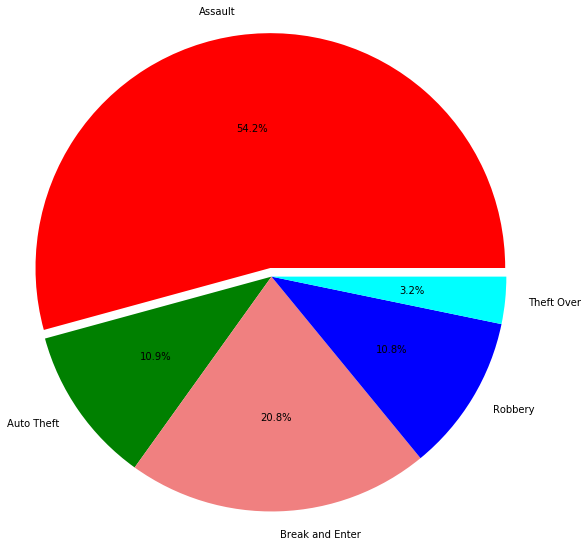

In [18]:
#Plot the Pie Chart for Majior Crime Indicator

x=["Assault","Auto Theft","Break and Enter","Robbery","Theft Over"]
explode_size = (0.1, 0, 0, 0, 0)
colors_s=[ 'red', 'green','lightcoral', 'blue', 'cyan']
plt.pie(Offence_data["Total Count of Offence"], labels=x, colors=colors_s, explode=explode_size, autopct="%1.1f%%",radius=1.8 * 1.5)

# Save the Figure
plt.savefig("MCI_pie.png")
# Show the Figure
plt.show()

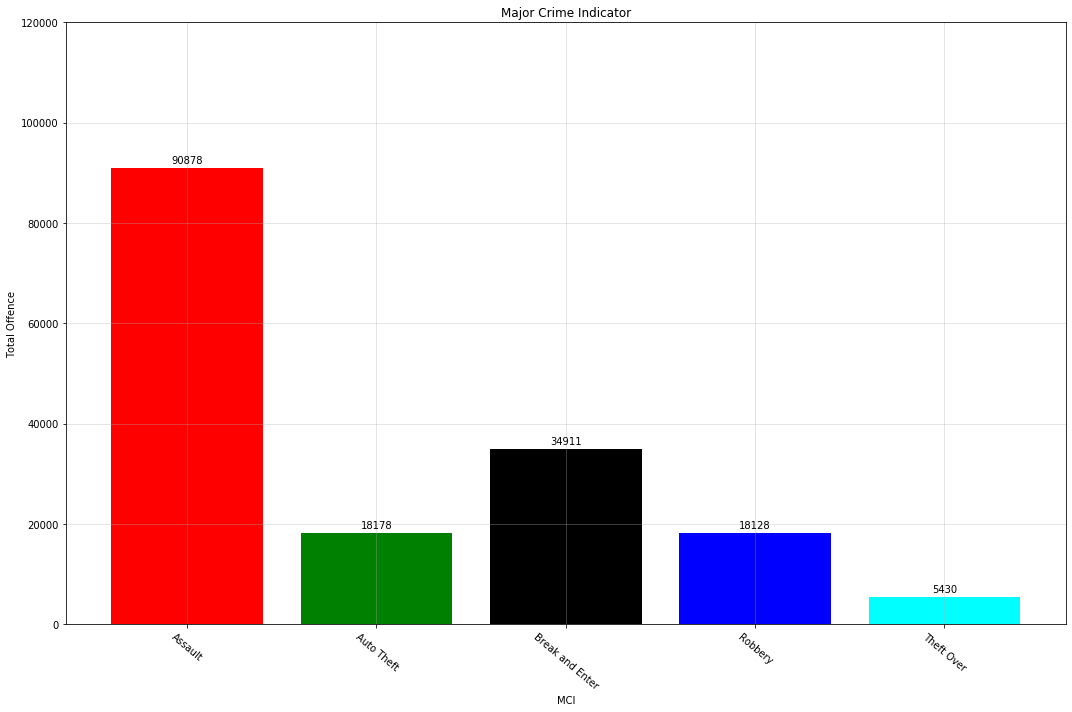

In [19]:
#Plot the bar graph for Majior Crime Indicator

x=["Assault","Auto Theft","Break and Enter","Robbery","Theft Over"]
fig, ax = plt.subplots(figsize=(15, 10))

rect1=ax.bar(x,Offence_data["Total Count of Offence"],color=[ 'red', 'green','black', 'blue', 'cyan'])

# Orient widths. Add labels, tick marks, etc. 
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rect1)
plt.title("Major Crime Indicator")
plt.xlabel("MCI")
plt.ylabel("Total Offence")

#Lable Each Bar
plt.ylim(0,120000)
plt.xticks(rotation=-40)
plt.grid(alpha = .4)
plt.tight_layout()

In [20]:
#Crime Analysis by year from 2013 to 2018
Crime_Data1 =  Crime_Data.loc[Crime_Data['occurrenceyear'] > 2013.0 ] 

Crime_Analysis1 = Crime_Data1.groupby(['occurrenceyear'])
Count_by_year=Crime_Analysis1["event_unique_id"].count()
CountByYear_Data=pd.DataFrame({"Total count of offence":Count_by_year})


CountByYear_Data


,Total count of offence
occurrenceyear,
2014.0,31628
2015.0,32282
2016.0,32751
2017.0,34457
2018.0,35382


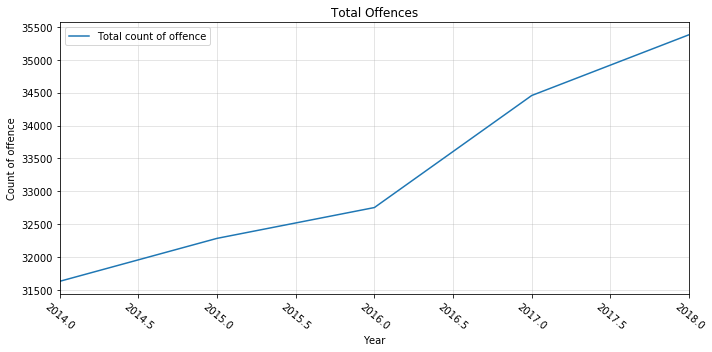

In [23]:
#Plot the line graph for Total offence by Year 2000 to 2018



CountByYear_Data.plot(figsize=(10, 5))

# Orient widths. Add labels, tick marks, etc. 
plt.title("Total Offences")

plt.xlabel("Year")
plt.ylabel("Count of offence")
plt.xticks(rotation=-40)
plt.grid(alpha = .4)
plt.tight_layout()

In [24]:
# Crime Analysis by Most Occurence of the week day
Crime_Analysis2 = Crime_Data.groupby(['occurrencedayofweek'])
CountByDay=Crime_Analysis2["event_unique_id"].count()
week=CountByDay[1]+CountByDay[4]+CountByDay[5]+CountByDay[6]
weekend=CountByDay[0]+CountByDay[2]+CountByDay[3]
OffenceByDay_data=pd.DataFrame({"Days":["Week day's","Weekend"],"Total Count of Offence":[week,weekend]})
OffenceByDay_data=OffenceByDay_data.set_index("Days")

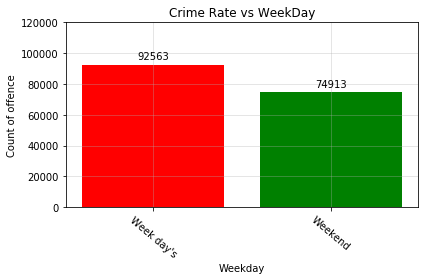

In [26]:
#Plot the Bar graph for Total offence by Weekday's
x=["Week day's","Weekend"]
fig, ax = plt.subplots()
bar1=ax.bar(x,OffenceByDay_data["Total Count of Offence"],color=[ 'red', 'green'])

# Orient widths. Add labels, tick marks, etc. 

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1)
plt.title("Crime Rate vs WeekDay")
plt.xlabel("Weekday")
plt.ylabel("Count of offence")
plt.ylim(0,120000)
plt.xticks(rotation=-40)
plt.grid(alpha = .4)
plt.tight_layout()
# Save the Figure
plt.savefig("CrimeVsDaysBar.png")
# Show the Figure
plt.show()

In [27]:
# Crime Analysis by Time of the day

bins=[0,6,12,18,24]
group_name=["12-6am","6am-12pm","12-6pm","6pm-12am"]
Crime_Data1["Time of Day"] = pd.cut(Crime_Data1["occurrencehour"],bins,labels=group_name)
            


Crime_Analysis2 = Crime_Data1.groupby(['Time of Day','MCI'])
CountByDay=Crime_Analysis2["event_unique_id"].count()
OffenceByDay_data=pd.DataFrame({"Total Count of Offence":CountByDay})





OffenceByDay_data.reset_index(inplace=True)


OffenceByDay_data1=pd.DataFrame(OffenceByDay_data.pivot(index='Time of Day', columns='MCI', values='Total Count of Offence'))


OffenceByDay_data1
OffenceByDay_data1.reset_index(inplace=True)


([<matplotlib.axis.XTick at 0x11dce4208>,
 <a list of 4 Text xticklabel objects>)

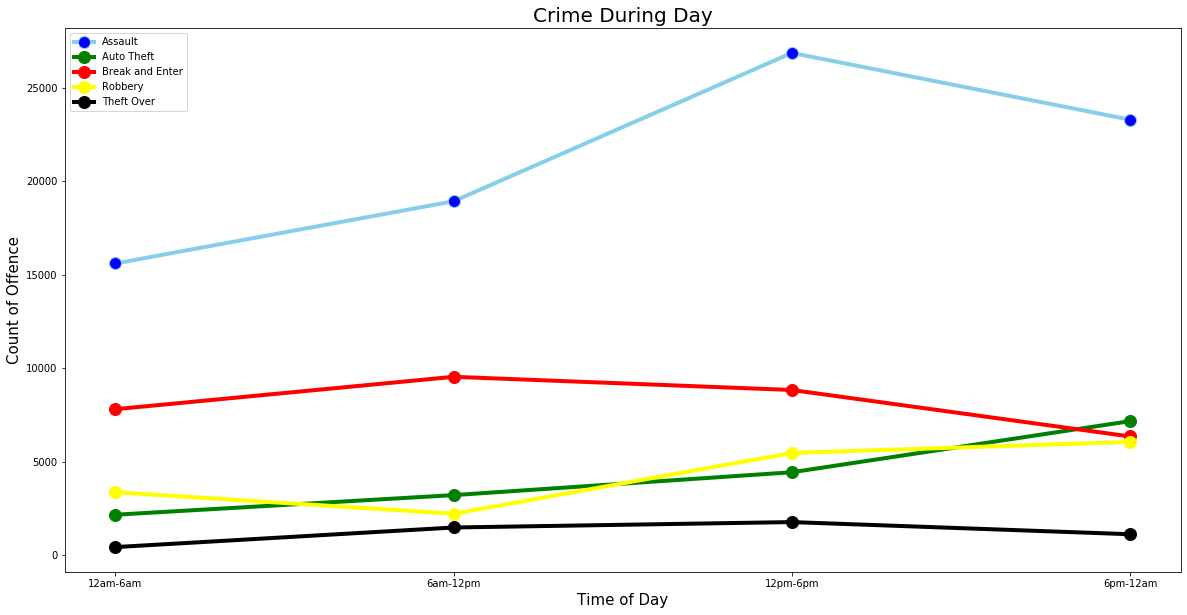

In [28]:


x_axis = np.arange(len(OffenceByDay_data1))

plt.figure(figsize = (20,10))
plt.plot( x_axis, OffenceByDay_data1['Assault'], marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4,label='Assault')
plt.plot( x_axis, OffenceByDay_data1['Auto Theft'], marker='o', markerfacecolor='green', markersize=12, color='green', linewidth=4,label='Auto Theft')
plt.plot( x_axis, OffenceByDay_data1['Break and Enter'], marker='o', markerfacecolor='red', markersize=12, color='red', linewidth=4,label='Break and Enter')
plt.plot( x_axis, OffenceByDay_data1['Robbery'], marker='o', markerfacecolor='yellow', markersize=12, color='yellow', linewidth=4,label='Robbery')
plt.plot( x_axis, OffenceByDay_data1['Theft Over'], marker='o', markerfacecolor='black', markersize=12, color='black', linewidth=4,label='Theft Over')
plt.legend()

# Set the plot title and axes titles
plt.title("Crime During Day",fontsize=20)
plt.ylabel("Count of Offence",fontsize=15)
plt.xlabel("Time of Day",fontsize=15)
# plt.xticks() set the location and labels of the ticks on the x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["12am-6am", "6am-12pm", "12pm-6pm", "6pm-12am"])

In [29]:
# Crime Analysis by Most Occurence of the Month
Crime_Analysis3 = Crime_Data.groupby(['occurrencemonth'])
CountByMonth=Crime_Analysis3["event_unique_id"].count()
OffenceByMonth_data=pd.DataFrame({"Total Count of Offence":CountByMonth})
OffenceByMonth_data.reset_index(inplace=True)
OffenceByMonth_data

,occurrencemonth,Total Count of Offence
0,April,13414
1,August,14536
2,December,13683
3,February,11809
4,January,13311
5,July,14669
6,June,14450
7,March,13070
8,May,14559
9,November,14662


In [30]:
#Sorting on Months

from sorted_months_weekdays import *

from sort_dataframeby_monthorweek import *


OffenceByMonth_data = Sort_Dataframeby_MonthandNumeric_cols(df = OffenceByMonth_data, monthcolumn='occurrencemonth',numericcolumn='Total Count of Offence')



([<matplotlib.axis.XTick at 0x11e6677b8>,
 <a list of 12 Text xticklabel objects>)

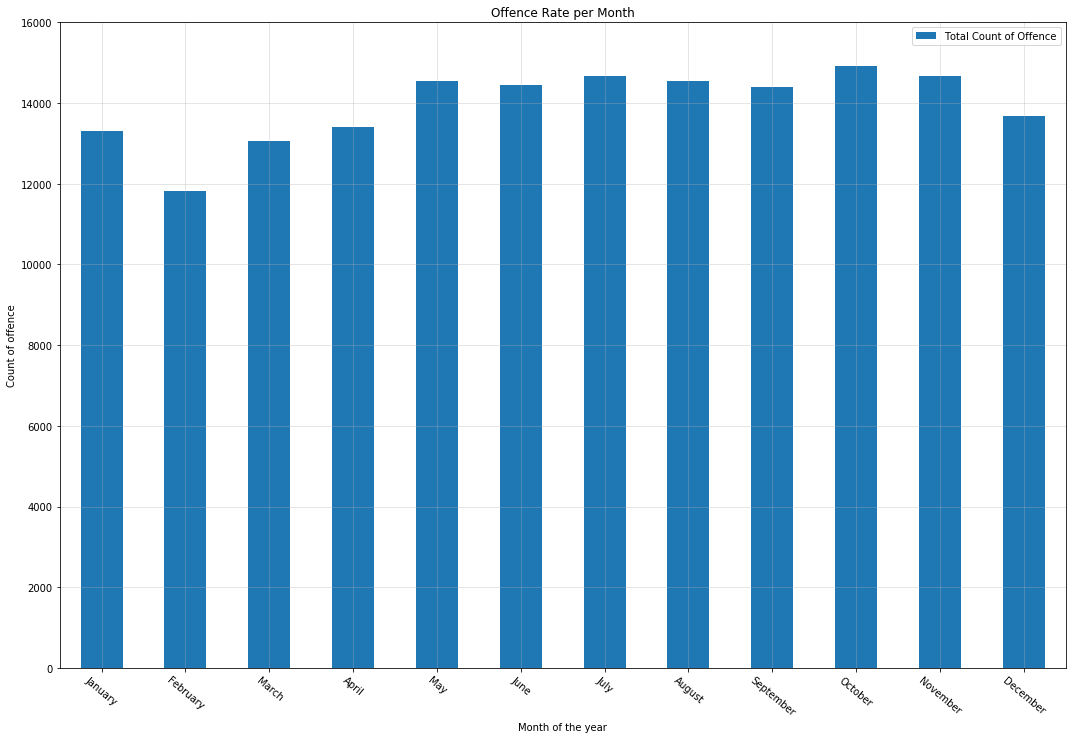

In [31]:
#Plot the Bar graph for Total offence by Month of the year

OffenceByMonth_data.plot.bar(figsize=(15, 10))

# Orient widths. Add labels, tick marks, etc. 
plt.title("Offence Rate per Month")
plt.xlabel("Month of the year")
plt.ylabel("Count of offence")
plt.ylim(0,16000)
plt.xticks(rotation=-40)
plt.grid(alpha = .4)
plt.tight_layout()

tick_locations = [value for value in np.arange(len(OffenceByMonth_data))]
plt.xticks(tick_locations, [y for y in OffenceByMonth_data['occurrencemonth']])

In [32]:
# Crime Analysis by season
Crime_Analysis3 = Crime_Data.groupby(['occurrencemonth'])
CountByMonth=Crime_Analysis3["event_unique_id"].count()
spring=CountByMonth[0]+CountByMonth[7]+CountByMonth[8]
summer=CountByMonth[6]+CountByMonth[5]+CountByMonth[1]
fall=CountByMonth[11]+CountByMonth[10]+CountByMonth[9]
winter=CountByMonth[2]+CountByMonth[3]+CountByMonth[4]
OffenceByMonth_data=pd.DataFrame({"Seasons ":["Spring","Summer","Fall","Winter"],"Total Count of Offence":[spring,summer,fall,winter]})
OffenceByMonth_data

,Seasons,Total Count of Offence
0,Spring,41043
1,Summer,43655
2,Fall,43975
3,Winter,38803


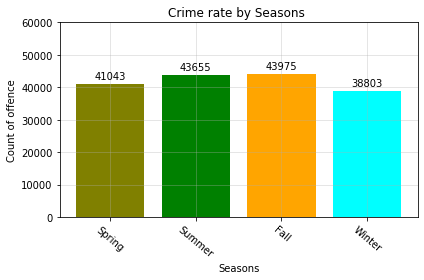

In [33]:

#Plot the Bar graph for Crime Rate by Month of the year
month=["Spring","Summer","Fall","Winter"]
fig, ax = plt.subplots()
bar2=ax.bar(month,OffenceByMonth_data["Total Count of Offence"],color=[ 'olive','green','orange','cyan'])

# Orient widths. Add labels, tick marks, etc. 

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar2)
plt.title("Crime rate by Seasons ")
plt.xlabel("Seasons")
plt.ylabel("Count of offence")
plt.ylim(0,60000)
plt.xticks(rotation=-40)
plt.grid(alpha = .4)
plt.tight_layout()
# Save the Figure
#plt.savefig("CrimeVsSeasonsBar.png")
# Show the Figure
plt.show()

In [34]:
#Crime analysis by Neighborhood 
Rent=Rental_DF[["Price","Lat","Long"]]
Rent_d=pd.DataFrame(Rent)
crime=Crime_DF.loc[Crime_DF["occurrenceyear"]==2018,["event_unique_id","MCI","occurrenceyear","Neighbourhood"]]
crime_d=pd.DataFrame(crime)

In [35]:
Crime = crime_d.groupby(['Neighbourhood'])
Count_byA=Crime["event_unique_id"].count()
CountByA_Data=pd.DataFrame({"Total count of offence":Count_byA})


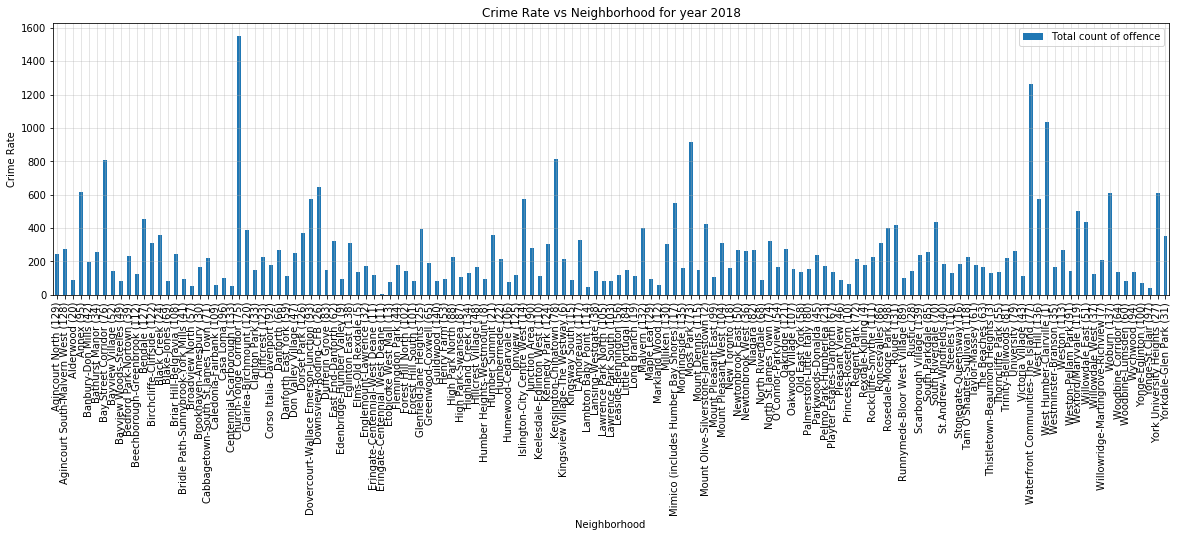

In [37]:
#Plot the Graph Crime Rate by Neghbourhood for Year 2018
CountByA_Data.plot.bar(figsize=(20,5))
# Orient widths. Add labels, tick marks, etc. 
plt.title("Crime Rate vs Neighborhood for year 2018")
plt.xlabel("Neighborhood ")
plt.ylabel("Crime Rate")
plt.grid(alpha = .4)
# Save the Figure
plt.savefig("CrimeVsNeihborhoodBar.png")
# Show the Figure
plt.show()

In [38]:
# Most Safe places to Rent as per crime rate in 2018

safe_Place=CountByA_Data.sort_values("Total count of offence")
safe_Place.head()

,Total count of offence
Neighbourhood,
Eringate-Centennial_West Deane (11),6
Yonge-St.Clair (97),41
Lambton Baby Point (114),44
Broadview North (57),50
Centennial Scarborough (133),52


In [39]:
# Most Unsafe places to Rent as per crime rate in 2018

unsafe_Place=CountByA_Data.sort_values("Total count of offence",ascending=False)
unsafe_Place.head()

,Total count of offence
Neighbourhood,
Church-Yonge Corridor (75),1552
Waterfront Communities-The Island (77),1266
West Humber-Clairville (1),1035
Moss Park (73),914
Kensington-Chinatown (78),815


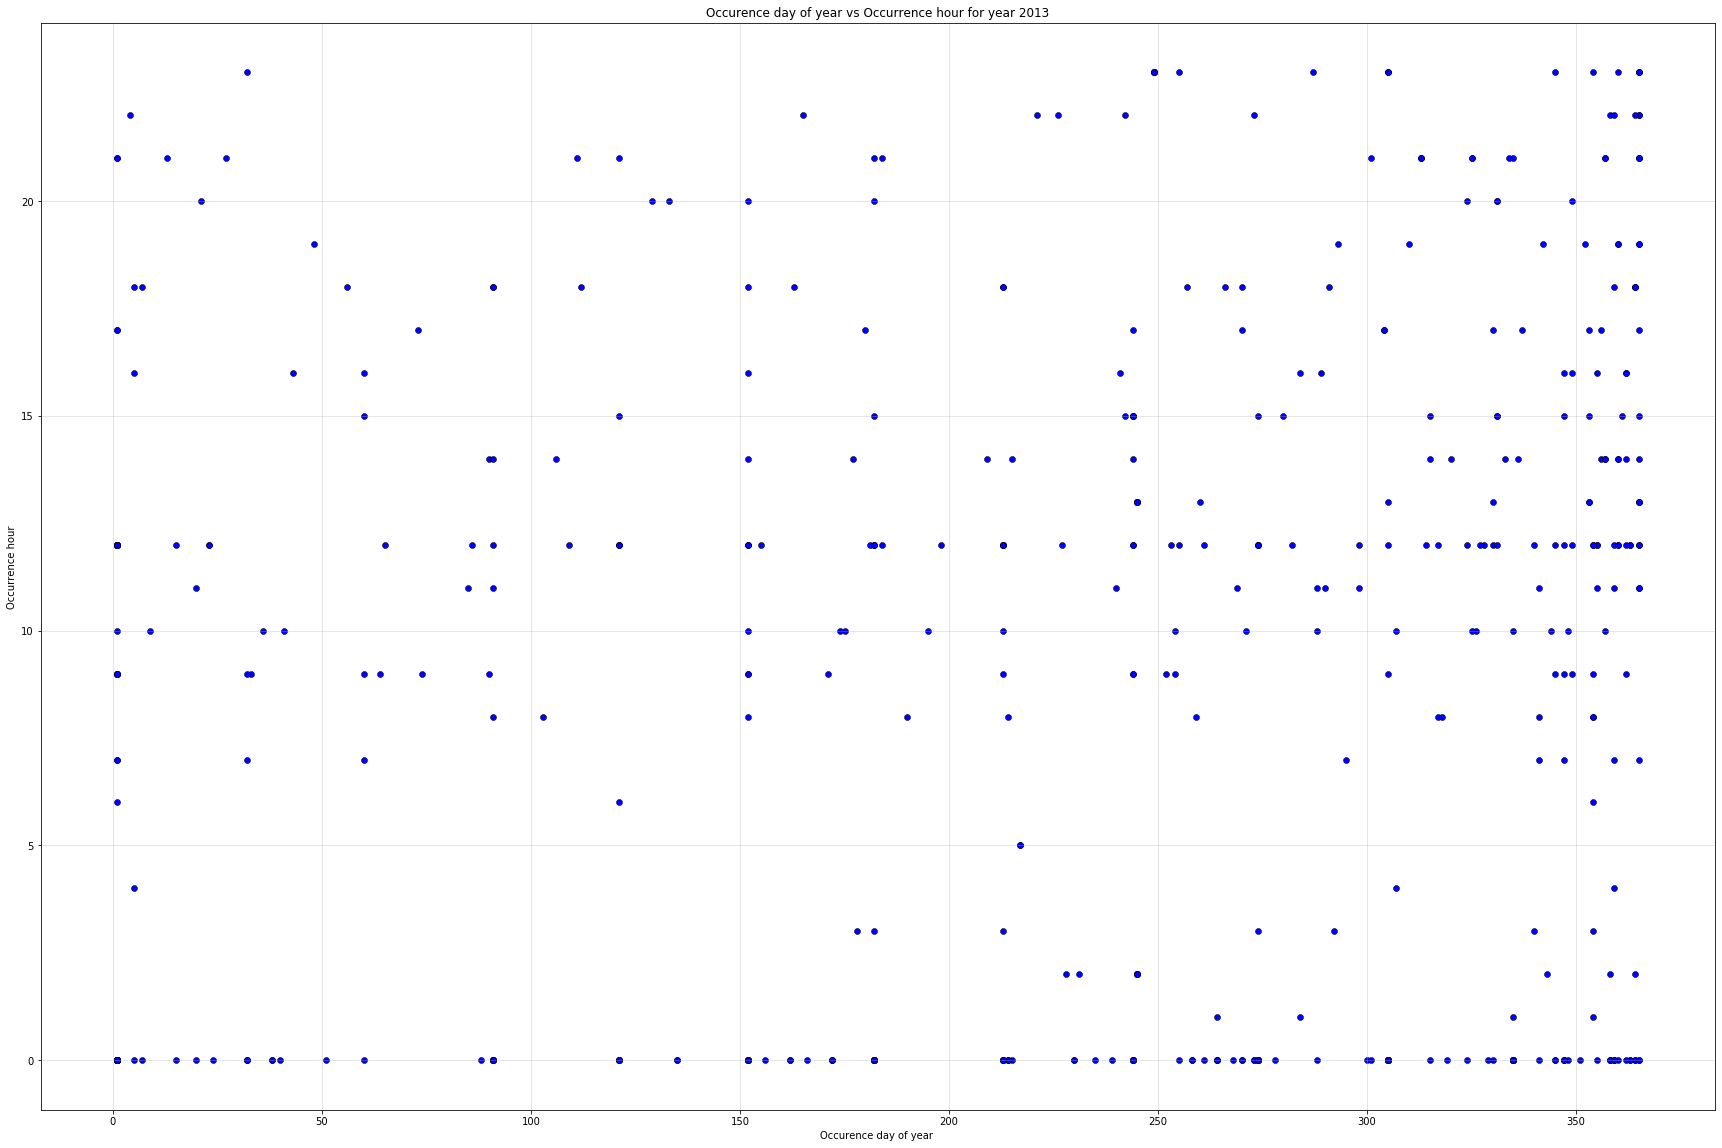

In [42]:
#Scatter plot Occurencedayofyear and occurencehour for one year
plt.figure(figsize=(30,20))
crime1=Crime_DF.loc[Crime_DF["occurrenceyear"]==2013,["occurrencedayofyear","occurrencehour"]]
crime_d1=pd.DataFrame(crime1)
plt.scatter(crime_d1["occurrencedayofyear"],crime_d1["occurrencehour"],linewidths = 0.5, edgecolors = 'black', color = 'blue')
# Orient widths. Add labels, tick marks, etc. 
plt.title("Occurence day of year vs Occurrence hour for year 2013")
plt.xlabel("Occurence day of year ")
plt.ylabel("Occurrence hour")
plt.grid(alpha = .4)
# Save the Figure
plt.savefig("Scatter.png")
# Show the Figure
plt.show()

In [43]:
#Heatmap to show the affected Neighborhood by Crime rate
Result=Crime_DF[["Lat","Long"]]

Crime_Rate_heatmap = Crime_DF[["Lat","Long","Hood_ID"]]

Crime_Rate_heatmap

,Lat,Long,Hood_ID
0,43.659229,-79.385193,76
1,43.777592,-79.425400,36
2,43.777592,-79.425400,36
3,43.801727,-79.210373,132
4,43.835884,-79.254334,130
...,...,...,...
167520,43.718910,-79.304466,43
167521,43.684856,-79.297562,62
167522,43.685402,-79.274391,122
167523,43.686760,-79.595566,1


In [46]:
#set geological center point

Toronto = (43.651070, -79.347015)

m = Crime_Rate_heatmap["Hood_ID"].astype(float)

fig = gmaps.figure(center = Toronto, zoom_level = 14)
heatmap_layer = gmaps.heatmap_layer(Result,
                                   weights = m)
fig.add_layer(heatmap_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [47]:
# Gmap to show available Renatal Properties with neighborhood 

Rental_map = Rental_DF[['Lat', 'Long']]
markers_locations = [tuple(x) for x in Rental_map.values]

In [48]:
Toronto =(43.651205,-79.374889)
fig = gmaps.figure(center=Toronto, zoom_level=15)
markers = gmaps.marker_layer(markers_locations)
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(height='420px'))